In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os
from glob import glob
import random
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, Activation, Conv2D
from keras.layers import Flatten, MaxPool2D, MaxPooling2D, BatchNormalization
%matplotlib inline
import random as r
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [148]:
train = "Images\\train"
test = "Images\\test"

In [149]:
files = []
label = ["0", "1"]

for filename in os.listdir(train):
    dirname = os.path.join(train, filename)
    for images in os.listdir(dirname):
        file = os.path.join(dirname, images)
        files.append(file)

In [152]:
f, axarr = plt.subplots(5,2,figsize=(20,20))

row = 0
images = 0

for col in range(2):
    while(1):
        if label[col] == files[images].split("\\")[2].split("_")[1]:
            axarr[row,col].imshow(plt.imread(files[images]))
            axarr[0,col].set_title(label[col], fontsize=15)
            axarr[row,col].set_xticks([])
            axarr[row,col].set_yticks([])
            row += 1
        if row == 5:
            row = 0
            break
        images += 1

In [ ]:
image_generator = ImageDataGenerator(rescale=1/255)    

train_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory=train,
                                                 shuffle=True,
                                                 target_size=(224,224), 
                                                 class_mode='categorical')

In [154]:
IMG_SHAPE = (224,224,3)
model = Sequential()
model.add(Conv2D(64,(3,3), activation='relu', input_shape=IMG_SHAPE))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

In [155]:
adam = Adam(learning_rate = 0.0001)
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

In [156]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 111, 111, 64)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 109, 109, 32)      18464     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 54, 54, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 52, 52, 32)        9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 26, 26, 32)      

In [158]:
# from keras.callbacks import CSVLogger
# os.makedirs('saved_model', exist_ok=True)

# csv_logger = CSVLogger('saved_model/training.log', separator=',', append=False)

model.fit(train_dataset,epochs = 15,verbose=2)
             

Epoch 1/15
216/216 - 186s - loss: 0.3377 - accuracy: 0.8714 - 186s/epoch - 862ms/step
Epoch 2/15
216/216 - 177s - loss: 0.2124 - accuracy: 0.9218 - 177s/epoch - 818ms/step
Epoch 3/15
216/216 - 192s - loss: 0.1957 - accuracy: 0.9295 - 192s/epoch - 891ms/step
Epoch 4/15
216/216 - 180s - loss: 0.1955 - accuracy: 0.9280 - 180s/epoch - 835ms/step
Epoch 5/15
216/216 - 184s - loss: 0.1684 - accuracy: 0.9385 - 184s/epoch - 850ms/step
Epoch 6/15
216/216 - 182s - loss: 0.1828 - accuracy: 0.9354 - 182s/epoch - 841ms/step
Epoch 7/15
216/216 - 182s - loss: 0.1568 - accuracy: 0.9452 - 182s/epoch - 841ms/step
Epoch 8/15
216/216 - 181s - loss: 0.1729 - accuracy: 0.9388 - 181s/epoch - 839ms/step
Epoch 9/15
216/216 - 181s - loss: 0.1447 - accuracy: 0.9485 - 181s/epoch - 839ms/step
Epoch 10/15
216/216 - 182s - loss: 0.1424 - accuracy: 0.9502 - 182s/epoch - 841ms/step
Epoch 11/15
216/216 - 180s - loss: 0.1217 - accuracy: 0.9589 - 180s/epoch - 836ms/step
Epoch 12/15
216/216 - 180s - loss: 0.1144 - accuracy

INFO:tensorflow:Assets written to: saved_model/Tumor_Classification\assets


INFO:tensorflow:Assets written to: saved_model/Tumor_Classification\assets


In [209]:
model = tf.keras.models.load_model('saved_model/Tumor_Classification')
history = pd.read_csv('saved_model/training.log', sep=',', engine='python')

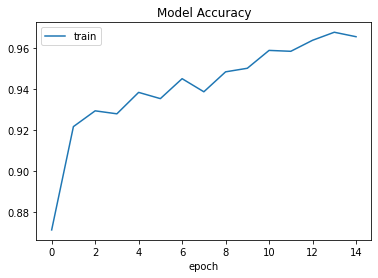

In [210]:
plt.plot(history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [211]:
plt.plot(history['loss'])
plt.title('Model loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [212]:
def pred_funs(address):
    image = tf.keras.preprocessing.image.load_img(address, target_size=(224, 224))
    img = np.array(image)
    img = img / 255.0
    img = img.reshape(1,224,224,3)
    result = np.argmax(model.predict(img))
    return label[result]

In [213]:
test_data = []
label_data = ["0", "1"]

for filename in os.listdir(test):
    dirname = os.path.join(test, filename)
    for images in os.listdir(dirname):
        file = os.path.join(dirname, images)
        test_data.append(file)
        
r.shuffle(test_data)

In [214]:
pred_funs(test_data[-1])

1/1 [==============================] - 0s 61ms/step


'0'

In [215]:
test_data[-1].split("\\")[2].split("_")[1]

'0'